<pre style="background-color: gray;">
All required Libraries and Packages will be install from requirements.txt file
</pre>

<pre style="background-color: gray;">
 <b>STEP 1:</b> Import All Dependencies
</pre>

In [1]:
#Importing Data Preprocessing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:

#machine learning dependencies
from collections import Counter
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier


<pre style="background-color: gray;">
 Load DataSet
</pre>

In [3]:
data = pd.read_csv("creditcard_2023.csv")

<h2 style="background-color:gray;"> Exploratory Data Analysis</h2>

<pre style="background-color: gray;">
  Show First five rows of the Dataset
</pre>

In [4]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


<pre style="background-color: gray;">
 Read number of rows and columns
</pre>

In [7]:
print(f"No. of rows in the dataset ==>> {data.shape[0]}")
print(f"No. of columns in the dataset ==>> {data.shape[1]}")

No. of rows in the dataset ==>> 568630
No. of columns in the dataset ==>> 31


<pre style="background-color: gray;">
 It will show all columns in the dataset
</pre>

In [8]:
pd.options.display.max_columns = None

<pre style="background-color: gray;">
 Display all columns in the Dataset
</pre>

In [9]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


<pre style="background-color: gray;">
 Display last five rows in the dataset
</pre>

In [10]:
data.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,1.430971,-1.330500,-1.580730,-1.363454,0.287766,-1.480796,-1.520928,-1.376970,1.789103,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,0.173590,-0.539948,0.738315,-0.812043,0.870447,-0.545184,-0.575991,-0.664313,0.101604,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,0.477582,-0.461849,-0.606100,-0.395126,-0.040673,-0.370201,-0.729002,-0.251679,-0.343196,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,-0.324934,0.335215,0.464177,-0.390369,0.893881,0.477402,0.848443,0.930280,-0.481058,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,-0.513556,0.892136,-1.153011,0.489197,-1.062488,0.207773,-0.917240,-0.936114,-0.823688,-0.330408,-0.621378,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


<pre style="background-color: gray;">
Display the shape of the dataset
</pre>

In [11]:
data.shape

(568630, 31)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

<h5 style="background-color: gray;">Heat Map</h5>

Text(0.5, 1.0, 'Heat map of Correlation')

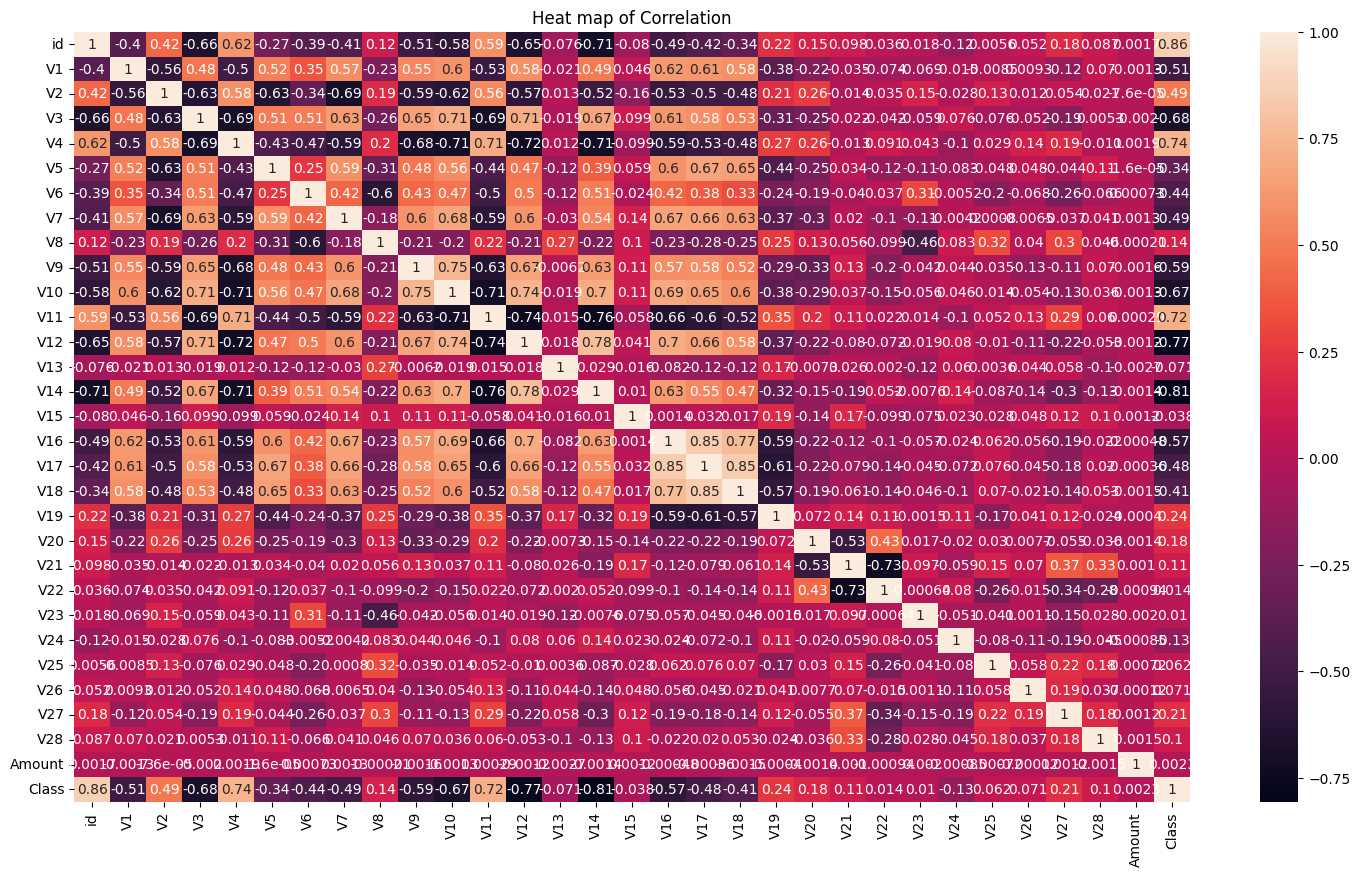

In [18]:
corr = data.corr()
plt.figure(figsize=(18,10))
heat = sns.heatmap(data=corr,annot=True)
plt.title("Heat map of Correlation")

<h2 style="background-color: gray;">
DATA PREPROCESSING
</h2>

<pre style="background-color: gray;">
1. Checking null values in the dataset
</pre>

In [19]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<pre style="background-color: gray;">
Analysis of Amount column
</pre>

In [20]:
data['Amount'].describe()

count    568630.000000
mean      12041.957635
std        6919.644449
min          50.010000
25%        6054.892500
50%       12030.150000
75%       18036.330000
max       24039.930000
Name: Amount, dtype: float64

<pre style="background-color:gray;">
Visualization of Amount column data
</pre>

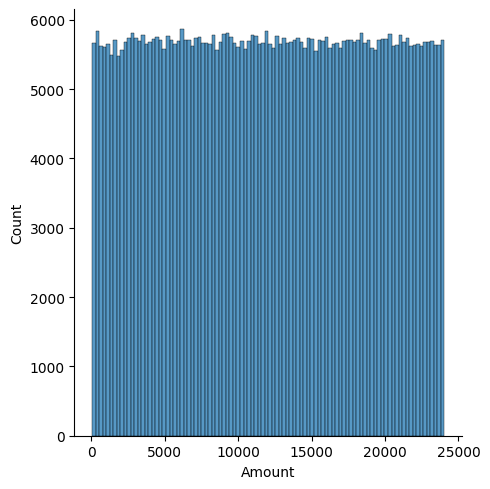

In [21]:
sns.displot(data['Amount'],bins=100)
plt.show()

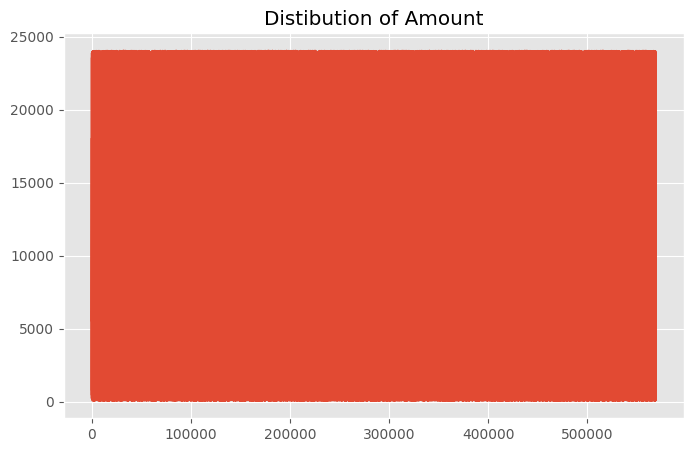

In [22]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distibution of Amount")
    plt.plot(data["Amount"])
    plt.show()

<pre style="background-color: gray;">
2. Converting Amount Column data into standard scale
</pre>

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [25]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285,0


<pre style="background-color: gray;">
3. Drop Time column
</pre>

In [26]:
data = data.drop(['id'], axis =1)

In [23]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285,0


<pre style="background-color: gray;">
4. Check for duplicate entry in the dataset
</pre>

In [27]:
data.duplicated().any()

True

<pre style="background-color: gray;">
5. Drop duplicate entry from the dataset
</pre>

In [28]:
data = data.drop_duplicates()

<pre style="background-color: gray">
Before dropping duplicate entries, total entries = 568630
After dropping duplicate entries, total entries = 568629.
Therefore, Below shape shows 1 as a duplicated entries.
</pre>

In [29]:
data.shape

(568629, 30)

<div style="background-color: gray;">
<pre>
Display Number of fraud and Normal transactions.
Below shows:
            No of Fraud transaction: 284314
            No of Normal transaction: 284315
In conclusion, number of normal transactions and fraud transactions in the dataset are equal which result balance of dataset.
<pre>
</div>

In [30]:
data['Class'].value_counts()

Class
0    284315
1    284314
Name: count, dtype: int64

<pre style="background-color: gray;">
Percentage of Fraud Transaction?
</pre>

In [31]:
fraudPercentage = round((len(data[data.Class==1])/len(data[data.Class==0]))*100,5)
print(f"The percentage of fraud transactions is {fraudPercentage} %")

The percentage of fraud transactions is 99.99965 %


<pre style="background-color: gray">
Visualization of Class column data
</pre>

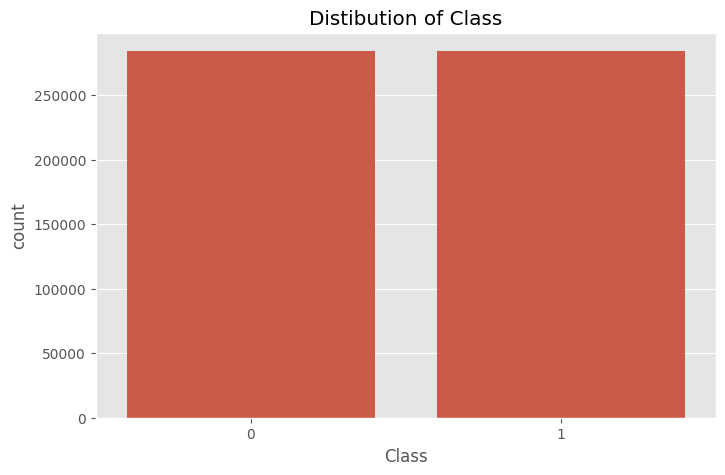

In [32]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distibution of Class")
    sns.countplot(data=data,x=data["Class"])
    plt.show()

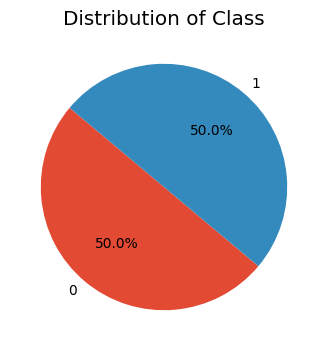

In [33]:
# Count the occurrences of each class
class_counts = data["Class"].value_counts()

# Plot the pie chart
with plt.style.context(('ggplot')):
    plt.figure(figsize=(4,4))
    plt.title("Distribution of Class")
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
    plt.show()

In [30]:
X = data.drop('Class', axis = 1)
y=data['Class']

In [31]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285,0


<pre style="font-size: 200 px; color: Green">
<b>Testing Different Algorithms performance</b>
</pre>

<pre style="background-color:gray;">
<b>Train</b>
<b>Test</b>
<b>Calculate Accuracy of different ML and CNN model
before handling imbalance dataset<b>
</pre>

<pre style="background-color: gray">
Split Dataset into Train and Test
</pre>

In [32]:
x=data.drop(["Class"],axis=1)
y=data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<h4 style="background-color:gray;">
Define Method for Calculating various metrics and confusion matrix
</h4>

<div style="background-color: gray;">
<p>
<b>Result:</b>
<ul>
<li>True Negative (TN) -85,251 no.: Genuine transactions correctly identified as real.</li>
<li>True Positive (TP)- 92 instances: Fraudulent transactions correctly identified as fraud.</li>
<li>False Negative (FN) - 52 instances: Fraudulent transactions incorrectly identified as genuine.</li>
<li>False Positive (FP) - 48 instances: Genuine transactions incorrectly identified as fraud.</li>
</div>

In [33]:
def Classification_Metrics(y_test,y_pred):
    accuracy = metrics.accuracy_score(y_test,y_pred)
    auc = metrics.roc_auc_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    f1_score = metrics.f1_score(y_test,y_pred)
    
    print(f'Accuracy: {accuracy:.5f}')
    print(f'AUC: {auc:.5f}')
    print(f'Precision: {precision:.5f}')
    print(f'Recall: {recall:.5f}')
    print(f'F1 Score: {f1_score:.5f}\n')
    
    # Confusion Metrix
    print("Confusion Matrix")
    cf = confusion_matrix(y_test, y_pred,normalize='true')
    sns.heatmap(cf,annot=True,cmap='OrRd')
    # cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
    # print(cnf_matrix)

<h4 style="background-color:gray;">
Define Method for displaying <b>ROC Curve</b>
</h4>

<p style="background-color:gray;">
ROC The ROC is a measure of how well classification problems work at different levels. It is basically a probability curve, and the better the
model is at predicting whether a transaction is fraud or not the higher the Area Under the Curve (AUC) number.<br><br>
It is a way to measure how well the model can tell the difference between two possible results. It shows if a model can clearly divide the
positive class from the negative class.
</p>

In [34]:
def Plot_Roc_Curve(y_test, y_pred, name):
    print("\n\nROC Curve")
    #Create a figure with a specific size
    plt.figure(figsize=(6,5))
    
    # Calculate ROC Curve Values
    fpr,tpr, thresholds = metrics.roc_curve(y_test,y_pred)
    
    # Calculate the AUC Score
    auc = metrics.roc_auc_score(y_test,y_pred)
    print(f'AUC Score: {auc}\n')
    
    #Plot the Roc Curve
    plt.plot(fpr,tpr,linewidth=2,label="AUC = {:.2f}".format(auc))
    plt.legend(loc=4)
    
    #Adding the diagonal line
    plt.plot([0,1],[0,1],'--')
    
    #Customize plot labels and title
    plt.rcParams['font.size'] =8
    plt.title('ROC curve for Credit Card Fraud Detection using '+name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    #Display the plot
    plt.show()


==========Logistic Regression===========
Accuracy: 0.96458
AUC: 0.96460
Precision: 0.97740
Recall: 0.95124
F1 Score: 0.96414

Confusion Matrix


ROC Curve
AUC Score: 0.9645977468529119



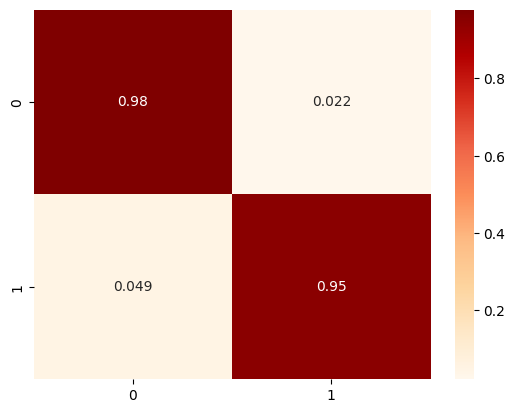

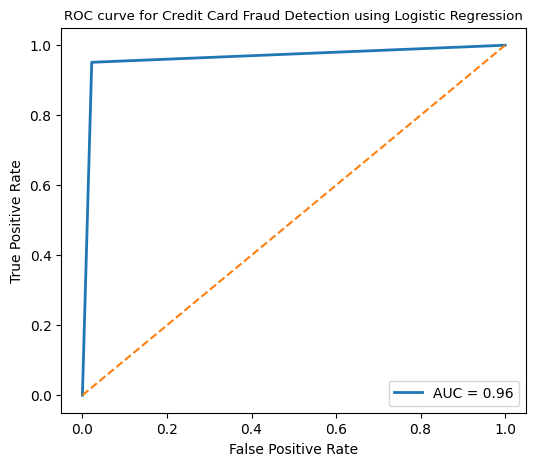


==========Decision Tree Classifier===========
Accuracy: 0.99787
AUC: 0.99787
Precision: 0.99704
Recall: 0.99872
F1 Score: 0.99788

Confusion Matrix


ROC Curve
AUC Score: 0.9978710510611851



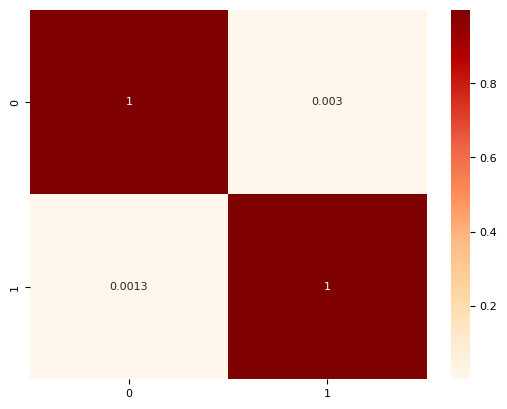

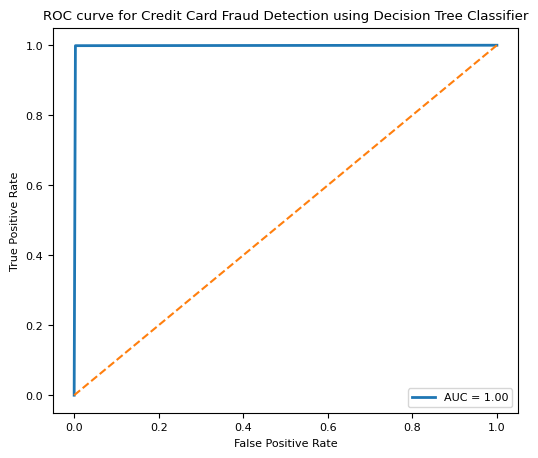


==========Random Forest Classifier===========
Accuracy: 0.99990
AUC: 0.99990
Precision: 0.99981
Recall: 1.00000
F1 Score: 0.99990

Confusion Matrix


ROC Curve
AUC Score: 0.9999031587843786



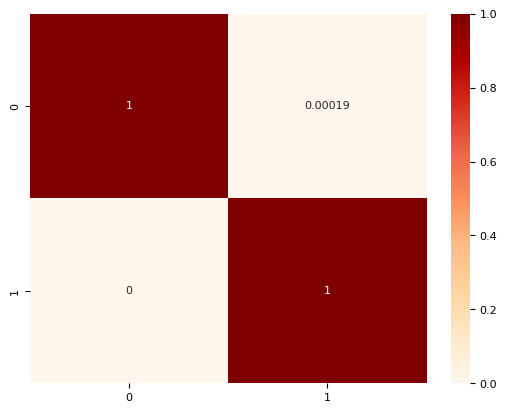

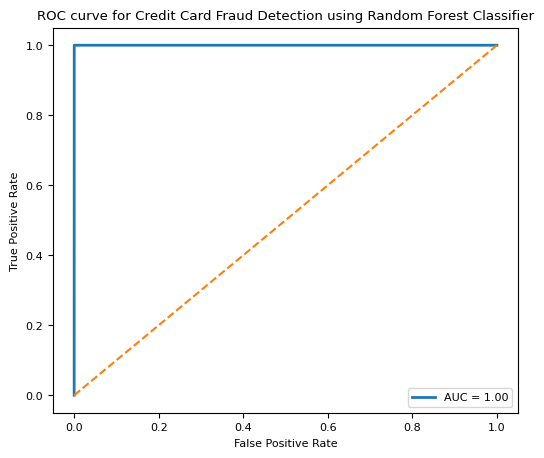


==========Gaussian Naive Bayes===========
Accuracy: 0.91814
AUC: 0.91821
Precision: 0.97544
Recall: 0.85808
F1 Score: 0.91300

Confusion Matrix


ROC Curve
AUC Score: 0.9182095421205209



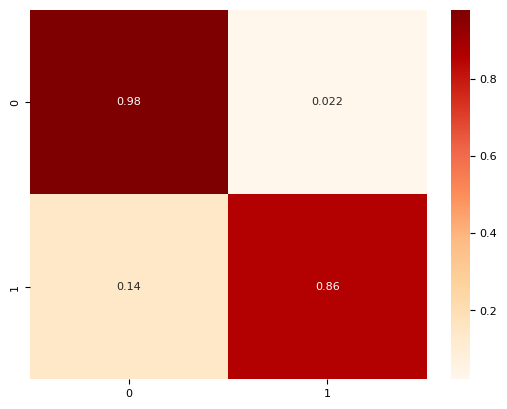

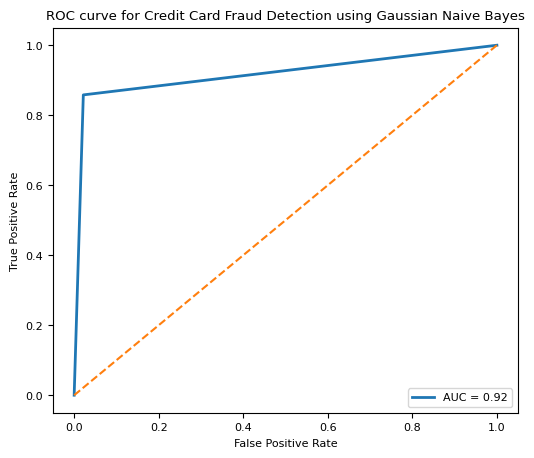


==========Support Vector Machine===========
Accuracy: 0.99705
AUC: 0.99704
Precision: 0.99647
Recall: 0.99763
F1 Score: 0.99705

Confusion Matrix


ROC Curve
AUC Score: 0.9970448219221033



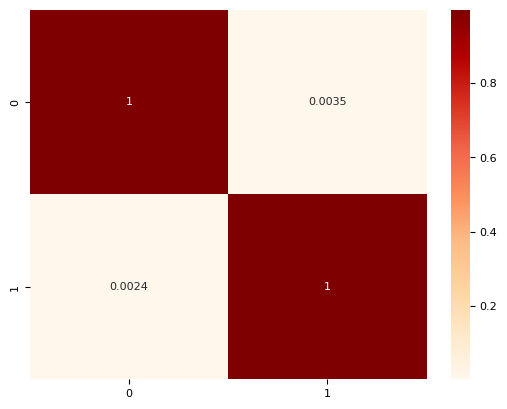

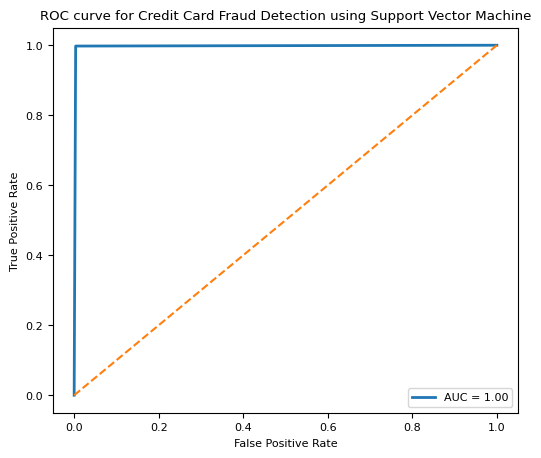


==========XGBoost===========
Accuracy: 0.98653
AUC: 0.98654
Precision: 0.99148
Recall: 0.98152
F1 Score: 0.98648

Confusion Matrix


ROC Curve
AUC Score: 0.9865351092497544



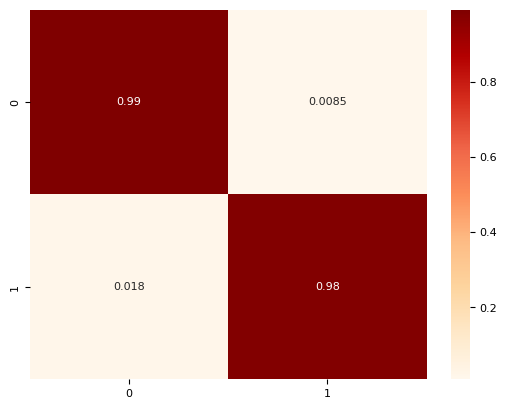

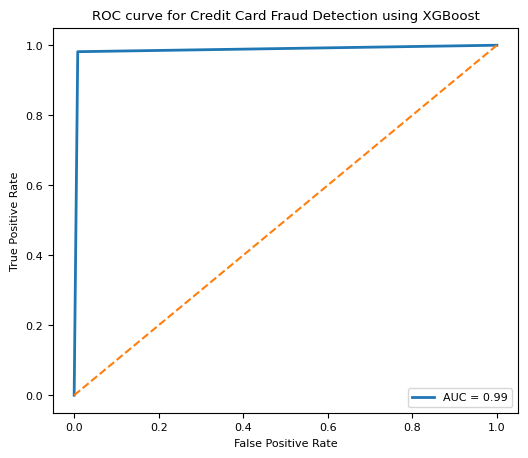


==========Extra_Tree_Classifier===========
Accuracy: 0.99976
AUC: 0.99976
Precision: 0.99954
Recall: 0.99998
F1 Score: 0.99976

Confusion Matrix


ROC Curve
AUC Score: 0.9997623201741764



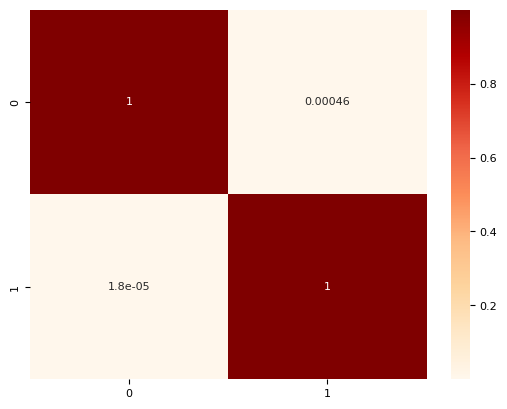

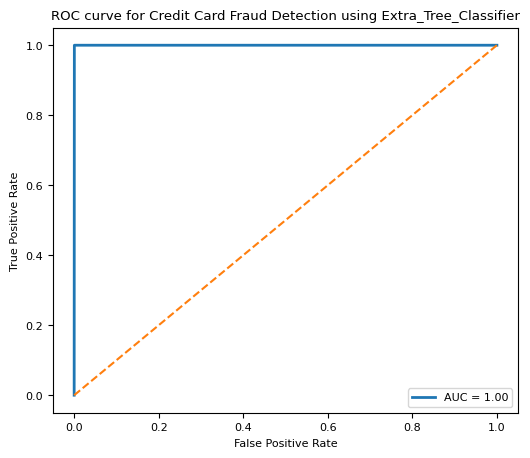


==========LGBM===========
[LightGBM] [Info] Number of positive: 227382, number of negative: 227521
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 454903, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499847 -> initscore=-0.000611
[LightGBM] [Info] Start training from score -0.000611
Accuracy: 0.99925
AUC: 0.99925
Precision: 0.99860
Recall: 0.99991
F1 Score: 0.99925

Confusion Matrix


ROC Curve
AUC Score: 0.9992517882146157



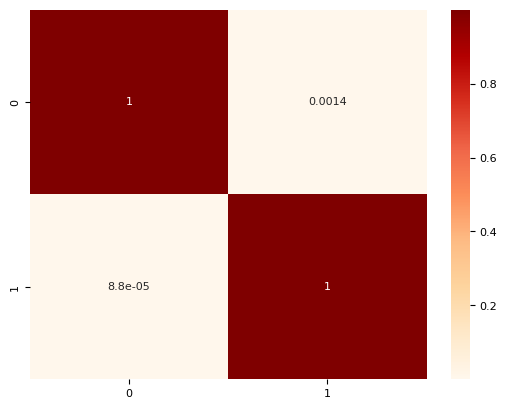

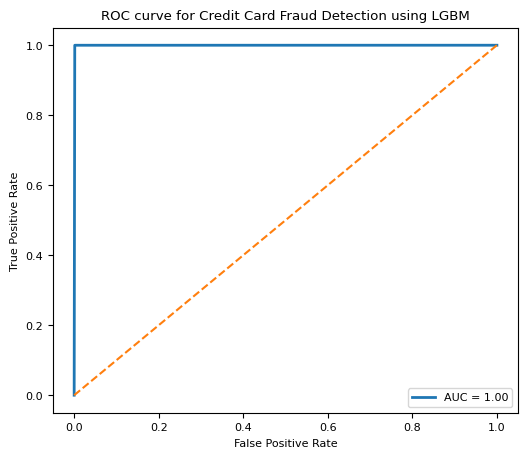

In [35]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier" : RandomForestClassifier(),
    "Gaussian Naive Bayes" : GaussianNB(),
    "Support Vector Machine" : svm.SVC(),
    "XGBoost" : XGBClassifier(max_depth=2),
    "Extra_Tree_Classifier" : ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2),
    "LGBM" : LGBMClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    Classification_Metrics(y_test,y_pred)
    Plot_Roc_Curve(y_test, y_pred,name)

<h2 style="background-color: gray;">
Train, Testing and checking accuracy using Neural network
</h2>

<h5 style="background-color: gray;">
Importing all dependences
</h5>

In [40]:
import tensorflow as tf
from collections import Counter
from tensorflow.keras.models import Sequential 
#from tensorflow.keras.layers import LSTM, Dense 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from keras.callbacks import TensorBoard
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten


In [41]:
def NeuralNetwork(X_train,X_test,y_train,y_test):
    #Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Build the neural network model
    # Dropout is a regularization technique used in neural networks to improve generalization,
    # reduce overfitting, and make the model more robust.
    # It has been shown to be effective in a wide range of deep learning tasks 
    # and is a valuable tool for improving the performance of neural network, 
    # especially when dealing with limited training data.
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    #Compile the model
    model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    #Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=200, validation_split=0.2, verbose=1)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"\n\nTest Loss:{loss*100:.4f}, Test Accuracy; {accuracy*100:.4f}\n\n")
    
    #Display model details
    model.summary()
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    #It show array of values. If value >0.5 then its 1(fraud) otherwise its 0(normal).
    y_pred[:5]
    
    # Convert into 0 and 1 that is predicted value
    binary_pred = ((y_pred > 0.5)).astype('int')
    
    #Original value
    y_test[:5]
    y_pred_classes =np.round(y_pred)
    
    # Print confusion matrix and classification report
    cf = confusion_matrix(y_test, y_pred_classes,normalize='true')
    sns.heatmap(cf,annot=True,cmap='OrRd')
    classification_rep = classification_report(y_test, y_pred_classes,digits=5)
    print("Classification Report:\n", classification_rep)
    
    Plot_Roc_Curve(y_test, y_pred, "CNN")
    #Classification_Metrics(y_test,y_pred)

<p style="background-color: gray">
Train, Test and Find accuracy of the CNN model
</p>

f:\Dissertation\My Dissertation Project\CreditCardFraudDetection2024\cnnEnv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9541 - loss: 0.1132 - val_accuracy: 0.9960 - val_loss: 0.0141
Epoch 2/10
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9949 - loss: 0.0168 - val_accuracy: 0.9987 - val_loss: 0.0055
Epoch 3/10
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9976 - loss: 0.0090 - val_accuracy: 0.9991 - val_loss: 0.0036
Epoch 4/10
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9983 - loss: 0.0067 - val_accuracy: 0.9994 - val_loss: 0.0027
Epoch 5/10
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9985 - loss: 0.0052 - val_accuracy: 0.9994 - val_loss: 0.0026
Epoch 6/10
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9989 - loss: 0.0046 - val_accuracy: 0.9992 - val_loss: 0.0031
Epoch 7/10
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.9994 - val_loss: 0.0024
Epoch 8/10
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9991 - loss: 0.0036 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,485 (142.52 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,324 (95.02 KB)

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0    1.00000   0.99905   0.99952     56794
           1    0.99905   1.00000   0.99953     56932

    accuracy                        0.99953    113726
   macro avg    0.99953   0.99952   0.99953    113726
weighted avg    0.99953   0.99953   0.99953    113726



ROC Curve
AUC Score: 0.9999597098531458



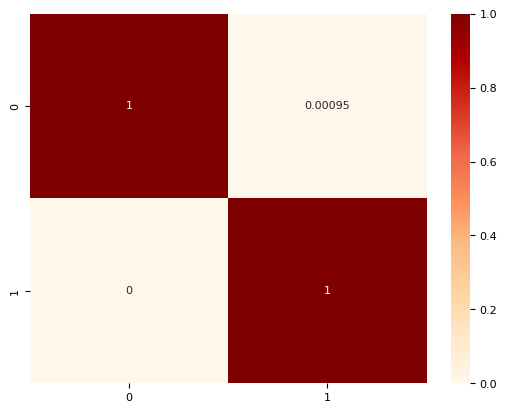

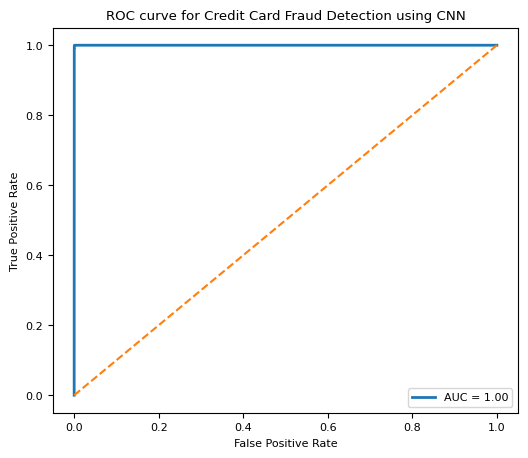

In [42]:
NeuralNetwork(X_train,X_test,y_train,y_test)

<h2 style="background-color: gray;">
Model Comparison and Conclusion
</h2>

<h2 style="background-color: gray;">
Selected Best Model 
</h2>